# **Practical Application III: Comparing Classifiers**

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### **Getting Started**

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### **Problem 1: Understanding the Data**

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### **Solution 1**
- The data represents 17 marketing campaigns

### **Problem 2: Read in the Data**

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

In [8]:
#bank = pd.read_csv('bank/bank.csv', sep=';')
bank = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [9]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Display the dataset information**

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
#bank = pd.read_csv('bank/bank.csv', sep=';')

In [12]:
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
#X = bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
#y = np.where(bank.y == 'yes', 1, 0)

**Select the columns to use**

In [14]:
XX = bank[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]
X = XX.drop(['y'], axis=1)
y = np.where(XX.y == 'yes', 1, 0)


**Encode the columms where needed**

In [15]:
le = LabelEncoder()

In [16]:
X.job = le.fit_transform(X.job)
X.marital = le.fit_transform(X.marital)
X.education = le.fit_transform(X.education)
X.default = le.fit_transform(X.default)
X.housing = le.fit_transform(X.housing)
X.loan = le.fit_transform(X.loan)

**Create the correlation matrix**

In [17]:
X.corr()

,age,job,marital,education,default,housing,loan
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000


**Use SMOTE to handle imbalanced classes**

In [18]:
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.20)

In [20]:
X_train.head(2)

,age,job,marital,education,default,housing,loan
14543,35,7,1,3,0,2,0
56260,55,1,1,2,0,0,0


### **Explore: Logistic Regression Classifier**

In [21]:
start = time.time()
logreg = LogisticRegression(random_state=42).fit(X_train, y_train)
stop = time.time()
logreg_train_time = stop - start

**Get the Train and Test MSEs**

In [22]:
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,test_preds))

test_mse = mean_squared_error(test_preds, y_test)
train_mse = mean_squared_error(train_preds, y_train)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.71      0.34      0.46      7332
           1       0.56      0.86      0.68      7288

    accuracy                           0.60     14620
   macro avg       0.64      0.60      0.57     14620
weighted avg       0.64      0.60      0.57     14620

Train MSE: 0.4031568506737807
Test MSE: 0.40095759233926126


In [23]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Plot the confusion matrix**

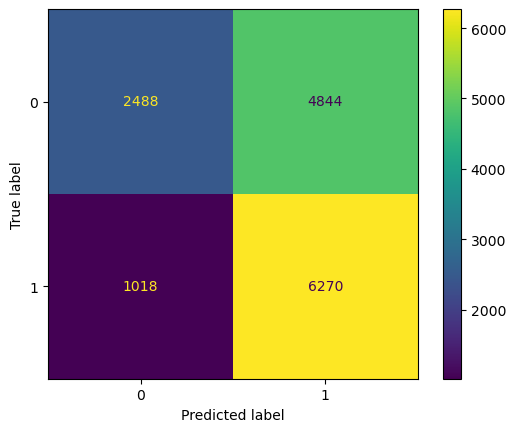

In [26]:
ConfusionMatrixDisplay.from_estimator(logreg,X_test,y_test)

In [27]:
logreg_tp = 6202
logreg_tn = 2486
logreg_fp = 4846
logreg_fn = 1086

In [28]:
logistic_score_test = logreg.score(X_test, y_test)
print("{:.3f}".format(logistic_score_test*100))
logistic_score_test

59.904


0.5990424076607387

**Get the accuracy, precision, recall and specificity**

In [29]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
solvers = ['lbfgs']

penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

logreg_grid = GridSearchCV(logreg, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
logreg_cv_res = logreg_grid.cv_results_

logreg_mean_fit_time = logreg_cv_res['mean_fit_time'][0]

print("Mean Fit Time: ", logreg_mean_fit_time)

logreg_grid_score_train = logreg_grid.score(X_train, y_train)
logreg_grid_score_test = logreg_grid.score(X_test, y_test)
print("LogReg Train Score:", logreg_grid_score_train)
print("LogReg Test Score:", logreg_grid_score_test)
print(" ")

logreg_acc = (logreg_tp+logreg_tn)/(logreg_tp+logreg_tn+logreg_fp+logreg_fn)*100
logreg_pre = (logreg_tp)/(logreg_tp+logreg_fp)*100
logreg_rec = (logreg_tp)/(logreg_tp+logreg_fn)*100
logreg_spe = (logreg_tn)/(logreg_tn+logreg_fp)*100

print("Accuracy = \t", "{:.10f}".format(logreg_acc))
print("Precision = \t", "{:.10f}".format(logreg_pre))
print("Recall = \t", "{:.10f}".format(logreg_rec))
print("Specificity = \t", "{:.10f}".format(logreg_spe))
print(" ")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Mean Fit Time:  0.24433279037475586
LogReg Train Score: 0.5958170873520761
LogReg Test Score: 0.5971272229822161
 
Accuracy = 	 59.4254445964
Precision = 	 56.1368573497
Recall = 	 85.0987925357
Specificity = 	 33.9061647572
 
Train MSE: 0.4031568506737807
Test MSE: 0.40095759233926126


**Explore the feature importance using permutation importance**

In [30]:
from sklearn.inspection import permutation_importance
r = permutation_importance(logreg_grid, X_test, y_test, n_repeats = 10, random_state = 123)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
4,default,0.081327
6,loan,0.010903
3,education,0.009713
0,age,0.004993
1,job,0.004248
2,marital,0.003577
5,housing,-0.000404


### **Explore: Decision Tree Classifier**

In [31]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
dtree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
stop = time.time()
dtree_train_time = stop - start

**Get the Train and Test MSEs**

In [32]:
dtree_train_preds = dtree.predict(X_train)
dtree_test_preds = dtree.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,dtree_test_preds))


dtree_test_mse = mean_squared_error(dtree_test_preds, y_test)
dtree_train_mse = mean_squared_error(dtree_train_preds, y_train)

print("DTree Train MSE:", dtree_train_mse)
print("DTree Test MSE:", dtree_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.80      0.70      0.75      7332
           1       0.73      0.83      0.78      7288

    accuracy                           0.76     14620
   macro avg       0.77      0.76      0.76     14620
weighted avg       0.77      0.76      0.76     14620

DTree Train MSE: 0.18787194746562694
DTree Test MSE: 0.2387140902872777


In [33]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

**Plot the confusion matrix**

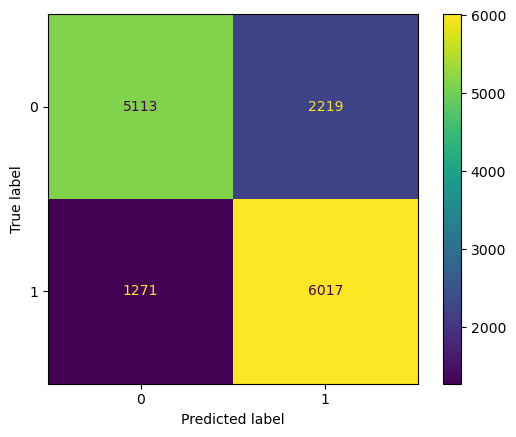

In [34]:
ConfusionMatrixDisplay.from_estimator(dtree,X_test,y_test)

In [35]:
dtree_tp = 6023
dtree_tn = 5077
dtree_fp = 2255
dtree_fn = 1265

**Get the accuracy, precision, recall and specificity**

In [36]:
splitter = ['best']

criterion = ['gini']
ccp_alphas = [10, 1.0, 0.1, 0.01]
grid = dict(splitter=splitter,criterion=criterion,ccp_alpha=ccp_alphas)

dtree_grid = GridSearchCV(dtree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
dtree_cv_res = dtree_grid.cv_results_

dtree_mean_fit_time = dtree_cv_res['mean_fit_time'][0]

print("Mean Fit Time: ", dtree_mean_fit_time)

dtree_grid_score_train = dtree_grid.score(X_train, y_train)
dtree_grid_score_test = dtree_grid.score(X_test, y_test)
print("LogReg Train Score:", dtree_grid_score_train)
print("LogReg Test Score:", dtree_grid_score_test)
print(" ")


dtree_acc = (dtree_tp+dtree_tn)/(dtree_tp + dtree_tn + dtree_fp + dtree_fn)*100
dtree_pre = (dtree_tp)/(dtree_tp + dtree_fp)*100
dtree_rec = (dtree_tp)/(dtree_tp + dtree_fn)*100
dtree_spe = (dtree_tn)/(dtree_tn + dtree_fp)*100


print("Accuracy = \t", "{:.10f}".format(dtree_acc))
print("Precision = \t", "{:.10f}".format(dtree_pre))
print("Recall = \t", "{:.10f}".format(dtree_rec))
print("Specificity = \t", "{:.10f}".format(dtree_spe))
print(" ")
print("Train MSE:", dtree_train_mse)
print("Test MSE:", dtree_test_mse)

Mean Fit Time:  0.3711916446685791
LogReg Train Score: 0.5921061632122581
LogReg Test Score: 0.5917236662106703
 
Accuracy = 	 75.9233926129
Precision = 	 72.7591205605
Recall = 	 82.6427003293
Specificity = 	 69.2444080742
 
Train MSE: 0.18787194746562694
Test MSE: 0.2387140902872777


**Get the feature importance using the permutation importance**

In [37]:
r = permutation_importance(dtree_grid, X_test, y_test, n_repeats = 10, random_state = 123)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
4,default,0.094145
0,age,0.000000
1,job,0.000000
2,marital,0.000000
3,education,0.000000
5,housing,0.000000
6,loan,0.000000


### **Explore: KNearestNeighbor Classifier**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
stop = time.time()
knn_train_time = stop - start

**Compute the Train and Test MSEs**

In [39]:
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,knn_test_preds))


knn_test_mse = mean_squared_error(knn_test_preds, y_test)
knn_train_mse = mean_squared_error(knn_train_preds, y_train)

print("KNN Train MSE:", knn_train_mse)
print("KNN Test MSE:", knn_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.76      0.67      0.71      7332
           1       0.70      0.79      0.74      7288

    accuracy                           0.73     14620
   macro avg       0.73      0.73      0.73     14620
weighted avg       0.73      0.73      0.73     14620

KNN Train MSE: 0.23563513236199465
KNN Test MSE: 0.2705198358413133


In [40]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Plot the confusion matrix**

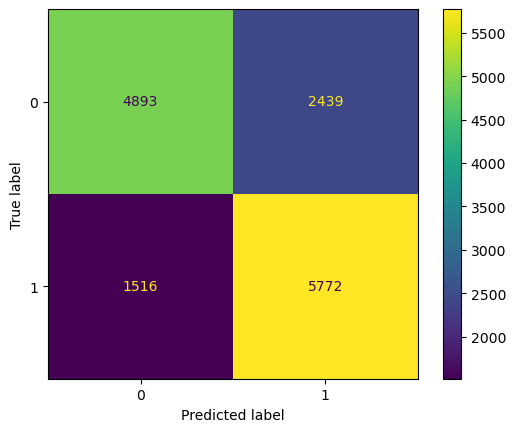

In [41]:
ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test)

In [42]:
knn_tp = 5717
knn_tn = 4869
knn_fp = 2463
knn_fn = 1571

**Compute the accuracy, precision, recall and specificity**

In [43]:
leaf_size = [30,20,10]

metric = ['minkowski']
n_neighbors = [10, 5, 3, 2]
grid = dict(leaf_size=leaf_size,metric=metric,n_neighbors=n_neighbors)

knn_grid = GridSearchCV(knn, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
knn_cv_res = knn_grid.cv_results_

knn_mean_fit_time = knn_cv_res['mean_fit_time'][0]
print("Mean Fit Time: ", knn_mean_fit_time)

knn_grid_score_train = knn_grid.score(X_train, y_train)
knn_grid_score_test = knn_grid.score(X_test, y_test)
print("KNN Train Score:", knn_grid_score_train)
print("KNN Test Score:", knn_grid_score_test)
print(" ")



knn_acc = (knn_tp + knn_tn)/(knn_tp + knn_tn + knn_fp + knn_fn)*100
knn_pre = (knn_tp)/(knn_tp + knn_fp)*100
knn_rec = (knn_tp)/(knn_tp + knn_fn)*100
knn_spe = (knn_tn)/(knn_tn + knn_fp)*100


print("Accuracy = \t", "{:.10f}".format(knn_acc))
print("Precision = \t", "{:.10f}".format(knn_pre))
print("Recall = \t", "{:.10f}".format(knn_rec))
print("Specificity = \t", "{:.10f}".format(knn_spe))
print(" ")
print("Train MSE:", knn_train_mse)
print("Test MSE:", knn_test_mse)


Mean Fit Time:  0.20674533843994142
KNN Train Score: 0.7643648676380054
KNN Test Score: 0.7294801641586868
 
Accuracy = 	 72.4076607387
Precision = 	 69.8899755501
Recall = 	 78.4440175631
Specificity = 	 66.4075286416
 
Train MSE: 0.23563513236199465
Test MSE: 0.2705198358413133


**Compute the feature importance using the permutation importance**

In [44]:
r = permutation_importance(knn_grid, X_test[:400], y_test[:400], n_repeats = 10, random_state = 42)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
0,age,0.22550
1,job,0.16650
3,education,0.12025
5,housing,0.09150
2,marital,0.06350
6,loan,0.05350
4,default,0.01975


### **Explore: Support Vector Machines**

In [45]:
X2 = X[:4000]
y2 = y[:4000]

X2, y2 = oversample.fit_resample(X2, y2)

In [46]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42, test_size = 0.10)

In [47]:
from sklearn.svm import SVC

start = time.time()
svc = SVC().fit(X2_train, y2_train)
stop = time.time()
svc_train_time = stop - start

**Compute the Train and Test MSEs**

In [48]:
svc_train_preds = svc.predict(X2_train)
svc_test_preds = svc.predict(X2_test)

print('Classification report for balanced classes \n',classification_report(y2_test,svc_test_preds))


svc_test_mse = mean_squared_error(svc_test_preds, y2_test)
svc_train_mse = mean_squared_error(svc_train_preds, y2_train)

print("SVC Train MSE:", svc_train_mse)
print("SVC Test MSE:", svc_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.70      0.50      0.58       405
           1       0.58      0.76      0.66       373

    accuracy                           0.63       778
   macro avg       0.64      0.63      0.62       778
weighted avg       0.64      0.63      0.62       778

SVC Train MSE: 0.36842857142857144
SVC Test MSE: 0.3740359897172236


In [49]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Plot the confusion matrix**

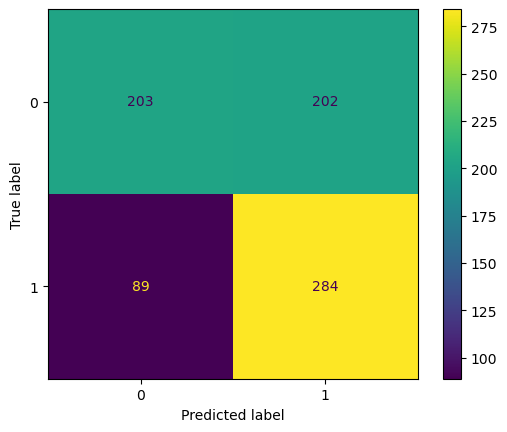

In [50]:
ConfusionMatrixDisplay.from_estimator(svc,X2_test,y2_test)

In [51]:
svc_tp = 289
svc_tn = 196
svc_fp = 209
svc_fn = 84

**Compute the accuracy, precision, recall and specificity**

In [52]:
kernel = ['rbf']

decision_function_shape = ['ovr']
c_values = [10, 1.0, 0.1, 0.01]
grid = dict(kernel=kernel,decision_function_shape=decision_function_shape,C=c_values)

svc_grid = GridSearchCV(svc, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X2_train, y2_train)
svc_cv_res = svc_grid.cv_results_

svc_mean_fit_time = svc_cv_res['mean_fit_time'][0]
print("Mean Fit Time: ", svc_mean_fit_time)

svc_grid_score_train = svc_grid.score(X2_train, y2_train)
svc_grid_score_test = svc_grid.score(X2_test, y2_test)
print("LogReg Train Score:", svc_grid_score_train)
print("LogReg Test Score:", svc_grid_score_test)
print(" ")


svc_acc = (svc_tp + svc_tn)/(svc_tp + svc_tn + svc_fp + svc_fn)*100
svc_pre = (svc_tp)/(svc_tp + svc_fp)*100
svc_rec = (svc_tp)/(svc_tp + svc_fn)*100
svc_spe = (svc_tn)/(svc_tn + svc_fp)*100


print("Accuracy = \t", "{:.10f}".format(svc_acc))
print("Precision = \t", "{:.10f}".format(svc_pre))
print("Recall = \t", "{:.10f}".format(svc_rec))
print("Specificity = \t", "{:.10f}".format(svc_spe))
print(" ")
print("SVC Train MSE:", svc_train_mse)
print("SVC Test MSE:", svc_test_mse)

Mean Fit Time:  3.7178299903869627
LogReg Train Score: 0.6338571428571429
LogReg Test Score: 0.6401028277634961
 
Accuracy = 	 62.3393316195
Precision = 	 58.0321285141
Recall = 	 77.4798927614
Specificity = 	 48.3950617284
 
SVC Train MSE: 0.36842857142857144
SVC Test MSE: 0.3740359897172236


**Compute feature importance using the permutation importance**

In [53]:
r = permutation_importance(svc_grid, X2_test[:100], y2_test[:100], n_repeats = 10, random_state = 123)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
4,default,0.121
0,age,0.031
3,education,0.019
6,loan,0.016
1,job,0.005
5,housing,0.005
2,marital,0.004


#### **Data Table of Values**

In [54]:
val_df = pd.DataFrame(columns = ['Model','Train Time', 'Train Score','Test Score','Mean fit time', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'Train MSE', 'Test MSE'])

In [55]:
val_df.loc[len(val_df.index)] = ['Logistic Regression', logreg_train_time, logreg_grid_score_train, logreg_grid_score_test, logreg_mean_fit_time, logreg_acc, logreg_pre, logreg_rec, logreg_spe, train_mse, test_mse] 
val_df.loc[len(val_df.index)] = ['Decision Tree', dtree_train_time, dtree_grid_score_train, dtree_grid_score_test, dtree_mean_fit_time, dtree_acc, dtree_pre, dtree_rec, dtree_spe, dtree_train_mse, dtree_test_mse]
val_df.loc[len(val_df.index)] = ['KNearestNeighbors', knn_train_time, knn_grid_score_train, knn_grid_score_test, knn_mean_fit_time, knn_acc, knn_pre, knn_rec, knn_spe, knn_train_mse, knn_test_mse]
val_df.loc[len(val_df.index)] = ['Support Vector Machine', svc_train_time, svc_grid_score_train, svc_grid_score_test, svc_mean_fit_time, svc_acc, svc_pre, svc_rec, svc_spe, svc_train_mse, svc_test_mse]


In [56]:
val_df

,Model,Train Time,Train Score,Test Score,Mean fit time,Accuracy,Precision,Recall,Specificity,Train MSE,Test MSE
0,Logistic Regression,0.161075,0.595817,0.597127,0.244333,59.425445,56.136857,85.098793,33.906165,0.403157,0.400958
1,Decision Tree,0.159570,0.592106,0.591724,0.371192,75.923393,72.759121,82.642700,69.244408,0.187872,0.238714
2,KNearestNeighbors,0.147165,0.764365,0.729480,0.206745,72.407661,69.889976,78.444018,66.407529,0.235635,0.270520
3,Support Vector Machine,3.471462,0.633857,0.640103,3.717830,62.339332,58.032129,77.479893,48.395062,0.368429,0.374036


### **Report**

The Analysis of the Logistic Regress, Decision Tree Classifier, KNeighborsClassifier and the Support Vector Machines was performed according to the following criteria
1. Imbalance Class Handling
2. Model Training Speed
3. Interpretable Results

Other criteria observed include
1. Accuracy
2. Precision
3. Recall
4. Specificity
5. Mean Squared Error

- **Logistic Regression Classifier**
    - SMOTE was used to handle imbalanced classes
    - Speed of Training is moderately high at 0.58s
    - Train Score performs slightly better than the Test Score
    - Accuracy and Specificity are not too high at 59. and 33.
    - Precision is low at 56.%
    - Recall is high at 85.%
    - Train and Test MSEs are relatively equal
- **Decision Tree Classifier**
    - SMOTE was used to handle imbalanced classes
    - Speed of Training is moderately high at 0.4s
    - Accuracy and Specificity are very high at 75.9% and 69.2% respectively
    - Train Score performs slightly better than the Test Score
    - Precision is high at 72.7%
    - Recall is low at 82.6%
    - However, the Decision Tree Classifier appears to overfit as Train MSE is lower than Test MSE
- **KNearest Neighbors Classifier**
    - SMOTE was used to handle imbalanced classes
    - Speed of Training is high at 0.45s
    - Accuracy and Specificity are very high at 72% and 66% respectively
    - Train Score is slightly higher than the Test Score
    - Precision is high at 69.8%
    - Recall is low at 78.4%
    - However, the KNNeighbors Classifier appears to slightly overfit since Test MSE is higher than Train MSE
    
- **Support Vector Machine**
    - SMOTE was used to handle imbalanced classes
    - Speed of Training is least at 12s
    - Accuracy and Specificity are very high at 62.8% and 48% respectively
    - Test Score is lower than Train Score
    - Precision is 58.%
    - Recall is high at 77.%
    - Train and Test MSE are relatively equal

### **Select Best Model: Support Vector Machine**
- The Support Vector Machine was selected as best model because the Train and Test MSEs are relatively equal.

## **Findings**

### **Solution 1**
- The data represents 17 marketing campaigns

### **The Business Objective**
- The business objective is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### **Findings**
- Age, Loan and default strongly determines if a client will subscribe a term deposit
- Customer's Housing, Marital Status, job and education play very little role in determining if a client will subscribe a term deposit

### **Recommendation**
- Focus on select customer age group for instance certain age group of customers are more likely to subscribe to a term deposit
- Focus on customers who had previous loan as they are more likely to subscribe
- Avoid Customers who have defaulted on a credit before since they pose a high risk
- Customers with housing are less likely to subscribe to a term deposit